In [1]:
import sys, os
# !pip install /users/sughosh/gsv_interface
!export FDB5_CONFIG_FILE=/scratch/project_465000454/sughosh/config.yaml
os.environ["FDB5_CONFIG_FILE"] = "/scratch/project_465000454/sughosh/config.yaml"
import xarray as xr
import numpy as np

In [4]:
!fdb-list expver=a08r,class=rd,stream=monr,date=19900101,time=0000,domain=g,type=fc,levtype=o2d

Listing for request
retrieve,
	expver=a08r,
	class=rd,
	stream=monr,
	date=19900101,
	time=0000,
	domain=g,
	type=fc,
	levtype=o2d


{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263122},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263121},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263100},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263001},length=146260
{class=rd,expver=a08r,stream=monr,date=19900101,time=0000,domain=g}{type=fc,levtype=o2d}{step=744,param=263101},length=146260


In [7]:

request= {
    "class": "rd",
    "expver": "a08r",
    "type": "fc",
    "domain": "g",
    "date": "19900101",
    "time": "0000",
    "grid": "1/1",

    # "step": "0/to/500000",
    # "stream": "monr",
    # "levtype": "sfc",
    # "param": ['151','167','260048'], #atms

    "step": "0/to/500000",
    "stream": "monr",
    "levtype": "pl",
    "levelist" : [1, 100, 500, 925], #[1,5,10,20,30,50,70,100,150,200250,300,400,500,600,700,850,925],
    "param": ['130','131','132','133'], #pl

    # "step": "0/to/500000",
    # "stream": "monr",
    # "levtype": "o2d",
    # "param": ['263001','263100','263101'] #ocean
}
from gsv.retriever import GSVRetriever
gsv = GSVRetriever()
ds = gsv.request_data(request)
ds

Missing weights file /scratch/project_465000454/igonzalez/gsv_weights/weights_nn_r360x181_r360x180_atmos.nc. Computing weights
Correctly decoded t      on level 1      at 1990-02-01T00:00:00
Correctly decoded u      on level 1      at 1990-02-01T00:00:00
Correctly decoded v      on level 1      at 1990-02-01T00:00:00
Correctly decoded q      on level 1      at 1990-02-01T00:00:00
Correctly decoded t      on level 100    at 1990-02-01T00:00:00
Correctly decoded u      on level 100    at 1990-02-01T00:00:00
Correctly decoded v      on level 100    at 1990-02-01T00:00:00
Correctly decoded q      on level 100    at 1990-02-01T00:00:00
Correctly decoded t      on level 500    at 1990-02-01T00:00:00
Correctly decoded u      on level 500    at 1990-02-01T00:00:00
Correctly decoded v      on level 500    at 1990-02-01T00:00:00
Correctly decoded q      on level 500    at 1990-02-01T00:00:00
Correctly decoded t      on level 925    at 1990-02-01T00:00:00
Correctly decoded u      on level 925    

<xarray.Dataset>
Dimensions:  (time: 360, height: 4, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * height   (height) int64 1 100 500 925
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    t        (time, height, lat, lon) float64 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    u        (time, height, lat, lon) float64 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    v        (time, height, lat, lon) float64 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    q        (time, height, lat, lon) float64 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>

In [6]:
# !rm /scratch/project_465000454/sughosh/replicability_data/atm_2d.nc
# ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_2d.nc")
ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_3d.nc")
# ds.to_netcdf("/scratch/project_465000454/sughosh/replicability_data/atm_2d.nc")


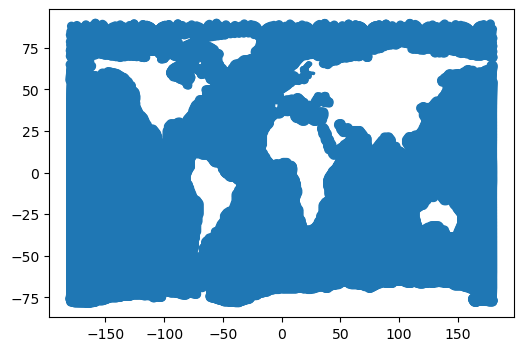

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(ds.lon, ds.lat, ds.avg_sos)

In [47]:
def monthly_range(start_date, end_date):
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        year = current_date.year + current_date.month // 12
        month = (current_date.month % 12) + 1
        current_date = datetime(year, month, 1)

ocean_data = [] 

from datetime import datetime, timedelta

start_date = datetime(1990, 1, 1)
end_date = datetime(2020, 1, 1)

request_oc= request.copy()

for dt in monthly_range(start_date, end_date):
    formatted_date = dt.strftime("%Y%m%d")
    request_oc["date"] = formatted_date
    ds = gsv.request_data(request_oc)
    ocean_data.append(ds)


Correctly decoded avg_siconc on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-02-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-03-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-04-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-05-01T00:00:00
Correctly decoded avg_siconc on level 0      at 1990-06-01T00:00:00
Correctly decoded avg_sos on level 0      at 1990-06-01T00:00:00
Correctly decoded avg_tos on level 0      at 1990-06-01T00:00:00
Correctly 

type: 

In [48]:
ocean_data = xr.concat(ocean_data, dim='time')